In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')
        
house_df = pd.read_csv("/content/drive/MyDrive/SureStartTrainingData/housepricedata.csv")
house_df.info()
house_df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
house_dataset = house_df.values

X = house_dataset[:,0:10]
Y = house_dataset[:,10]

# Normalize the X values into 0 to 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
# Split the dataset again for a training, validation and testing set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [4]:
# Define the model - 3 layers (ReLu, ReLu, Sigmoid)
model_1 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01),),
])
# Compile the model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Model_1 defined and compiled!")
print("Model_2 defined and compiled!")

Model_1 defined and compiled!
Model_2 defined and compiled!


In [5]:
# Train the moodel for 100 epochs -
hist_1 = model_1.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 15ms/step - loss: 0.5467 - accuracy: 0.7220 - val_loss: 0.3474 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3447 - accuracy: 0.8637 - val_loss: 0.3225 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8685 - val_loss: 0.3027 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 0.8637 - val_loss: 0.2794 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2895 - accuracy: 0.8783 - val_loss: 0.3020 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8633 - val_loss: 0.2273 - val_accuracy: 0.9087
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.8961 - val_loss: 0.2592 - val_accuracy: 0.9041
Epoch 8/100


7/7 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8904


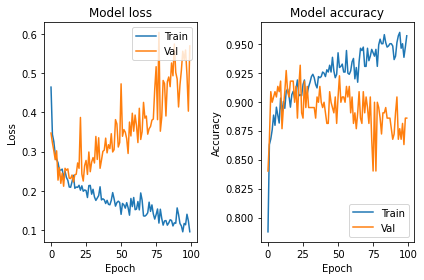

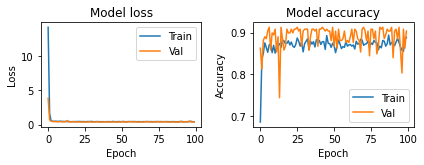

In [8]:
model_1.evaluate(X_test, Y_test)[1]
model_2.evaluate(X_test, Y_test)[1]

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 1)
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.tight_layout()
plt.show()